# Bellevue University DSC640 Term Project Milestone 3 – National Database of Childcare Prices (NDCP) Medium Touch-Ups
**Author:** Zicheng (Chance) Xu

**Term:** 2025 Summer

This notebook presents the media touch-ups for Milestone 3 of the term project. At this stage, the goal is to enhance the visual mock-ups created in Milestone 2 by incorporating real data into each of the three planned media formats:
1. **Tableau dashboard** – interactive infographic-style exploration
2. **PowerPoint deck** – presentation-oriented storytelling
3. **Standalone infographic** – public-facing visual summary

Based on Professor Schneider's feedback from Milestone 2, I need more unique visual content beyond maps and stats dashboard to justify the medium’s inclusion and strength, and that applies to other mediums as well. This will be my focus for this milestone.

## Data Preparation and Export

According to the technical report data dictionary, the columns can be categorized into the following sub categories which we can refer to later in the project (**In the order of the columns in the data, not the data dictionary**):
1. State and County names and codes
2. Study Year
3. Employment and unemployment rates, labor force participation rates, and poverty rates for different age groups and genders
4. Different kinds of income and earnings, including age groups
5. Total population and population by different races
6. Number of households and number of households by age groups and who's working or single mother
7. Percent of civilians emloyed by different occupations and age and gender groups:
    - Management, business,science, and arts
    - Service
    - Sales and office
    - Natural resources, construction, and maintenance
    - Production, transportation, and material moving
8. All other fields with i in the beginning, indicating if that related field was imputed or not

From column index EB in the data:

9. Median prices for center-based care by different age groups
10. Median prices of family child care by different age groups
11. 75th percentile price of center based care by different age groups
12. 75th percentile price of family child care by different age groups
13. All other fields with i in the beginning, value indicating summary of imputations made to the related field

From column index HL in the data:

14. Median prices for center-based care aggregated weekly by infant, toddler, preschool groups
15. 75th percentile price of center based care by infant, toddler, preschool groups
16. Median prices of family child care aggregated weekly by infant, toddler, preschool groups
17. 75th percentile price of family child care by infant, toddler, preschool groups

From column index IJ in the data:

18. State FIPS Code
19. Employment and unemployment rates, labor foce participation rates, and poverty rates for different age groups and genders, at the **state level**
20. Different kinds of income and earnings, including age groups, at the **state level**
21. Total population and population by different races, at the **state level**
22. Number of households and number of households by age groups and who's working or single mother, at the **state level**
23. Percent of civilians emloyed by different occupations and age and gender groups, at the **state level**:
    - Management, business,science, and arts
    - Service
    - Sales and office
    - Natural resources, construction, and maintenance
    - Production, transportation, and material moving
24. All other fields with i in the beginning, indicating if that related field was imputed or not

### Load and Prepare the Data for Tableau Dashboard

In [2]:
# Initial loading of necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# display options
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
DATA_PATH = Path('NDCP2022.xlsx')  # I put the file in same directory as the notebook

# Checking the file existence
if not DATA_PATH.exists():
    raise FileNotFoundError('Please make sure NDCP2022.xlsx is in the working directory.')

# peek at sheet names & first few rows to confirm layout
xl = pd.ExcelFile(DATA_PATH, engine='openpyxl')
print('Sheets:', xl.sheet_names)
df_head = xl.parse(xl.sheet_names[0], nrows=5)
display(df_head.head())

Sheets: ['County_LevelNDCP_v8_update2008_']


STATE_NAME STATE_ABBREVIATION           COUNTY_NAME  COUNTY_FIPS_CODE  \
0    Virginia                 VA      Arlington County             51013   
1  New Mexico                 NM     Los Alamos County             35028   
2    Virginia                 VA     Falls Church City             51610   
3    Virginia                 VA     Falls Church City             51610   
4  California                 CA  San Francisco County              6075   

   STUDYYEAR  EMR_16  FEMR_16  MEMR_16  EMR_20to64  FEMR_20to64  MEMR_20to64  \
0       2022    74.4     71.6     77.1        84.5         83.2         85.7   
1       2022    65.6     59.9     70.9        80.2         74.4         85.6   
2       2022    68.3     65.9     70.9        83.9         78.5         89.8   
3       2021    69.6     64.8     74.7        83.6         77.4         90.4   
4       2022    66.6     63.4     69.6        80.1         78.6         81.4   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  MUNR_20to64  \
0     2.8      2.5      3.1         2.6          2.3          2.8   
1     1.9      1.5      2.2         1.8          1.5          2.0   
2     6.0      6.4      5.6         3.0          4.8          1.2   
3     5.1      6.2      4.1         3.5          5.1          2.0   
4     5.4      4.7      5.9         5.1          4.4          5.7   

   FLFPR_20to64  FLFPR_20to64_UNDER6  FLFPR_20to64_6to17  \
0          86.2                 85.9                81.8   
1          76.1                 81.4                78.8   
2          83.4                 70.4                79.4   
3          81.8                 72.8                76.6   
4          82.3                 79.8                80.8   

   FLFPR_20to64_UNDER6_6to17  MLFPR_20to64  PR_F  PR_P     MHI     MFI  \
0                       76.1          91.4   4.4   6.7  137387  188191   
1                       61.6          88.5   2.9   3.7  135801  158708   
2                       89.9          93.0   1.6   2.3  164536  207090   
3                       91.4          94.5   1.2   2.5  155071  187303   
4                       71.0          86.4   5.5  10.5  136689  159981   

   MFI_2022     ME    FME     MME  MHI_2022  ME_2022  FME_2022  MME_2022  \
0    188191  84891  74250   94665    137387    84891     74250     94665   
1    158708  83135  63904   99370    135801    83135     63904     99370   
2    207090  82598  61250  109943    164536    82598     61250    109943   
3    204160  80542  61964  102708    169027    87791     67541    111952   
4    159981  78669  70078   87411    136689    78669     70078     87411   

   TOTALPOP  ONERACE  ONERACE_W  ONERACE_B  ONERACE_I  ONERACE_A  ONERACE_H  \
0    235845     90.5       65.0        9.3        0.4       10.3        0.1   
1     19253     89.6       78.6        1.2        1.0        5.3        0.0   
2     14576     89.6       72.5        4.6        0.3        8.8        0.0   
3     14494     93.0       76.4        4.7        0.2        9.2        0.0   
4    851036     90.5       41.9        5.2        0.6       34.8        0.4   

   ONERACE_OTHER  TWORACES  HISPANIC  HOUSEHOLDS  H_UNDER6_BOTHWORK  \
0            5.5       9.5      15.6      110887               9479   
1            3.5      10.4      18.3        8149                527   
2            3.4      10.4      11.3        5740                578   
3            2.3       7.0      10.7        5630                660   
4            7.7       9.5      15.5      360842              24428   

   H_UNDER6_FWORK  H_UNDER6_MWORK  H_UNDER6_SINGLEM  H_6to17_BOTHWORK  \
0            2228             722              1556             15762   
1             343              55               112              1770   
2             212              46                 0              1383   
3             193              45                31              1325   
4            7441            1052              5598             35637   

   H_6to17_FWORK  H_6to17_MWORK  H_6to17_SINGL

Data looks good, let's do full load.

In [6]:
# Step 1: Load and Rename Columns

# Define columnes needed
use_cols = [
    'STATE_NAME', 'STATE_ABBREVIATION', 'COUNTY_NAME', 'COUNTY_FIPS_CODE', # Geolocation info
    'STUDYYEAR', # Year 
    'MCINFANT', 'MCTODDLER', 'MCPRESCHOOL', # Median Price of Center-Based Care by Age Groups: Infant, Toddler, Preschool
    'MFCCINFANT', 'MFCCTODDLER', 'MFCCPRESCHOOL', # Median Price of Family Child Care by Age Groups: Infant, Toddler, Preschool
    'MHI', # Median Household Income
    'FME', 'MME', # Median Earnings by gender
    'FLFPR_20to64', 'MLFPR_20to64', # Female and Male Labor Force Participation Rate (20-64)
    # Below used for summary dashboard
    'PR_P', 'TOTALPOP','EMP_M', 'EMP_SERVICE', 'EMP_SALES', 'EMP_N', 'EMP_P', 'TOTALPOP_STATE'
]

# Load only selected columns
df = pd.read_excel("NDCP2022.xlsx", usecols=use_cols)

# Rename for clarity
df = df.rename(columns={
    'STATE_NAME': 'state',
    'STATE_ABBREVIATION': 'state_abbreviation',
    'COUNTY_NAME': 'county',
    'COUNTY_FIPS_CODE': 'county_fips_code',
    'STUDYYEAR': 'year',
    'MCINFANT': 'center_care_median_infant',
    'MCTODDLER': 'center_care_median_toddler',
    'MCPRESCHOOL': 'center_care_median_preschool',
    'MFCCINFANT': 'family_care_median_infant',
    'MFCCTODDLER': 'family_care_median_toddler',
    'MFCCPRESCHOOL': 'family_care_median_preschool',
    'MHI': 'median_household_income',
    'FME': 'female_median_earnings',
    'MME': 'male_median_earnings',
    'FLFPR_20to64': 'female_labor_force_participation',
    'MLFPR_20to64': 'male_labor_force_participation',
    'PR_P': 'poverty_rate',
    'TOTALPOP': 'total_population',
    'TOTALPOP_STATE': 'state_total_population',
    'EMP_M': 'pct_employed_management',
    'EMP_SERVICE': 'pct_employed_service',
    'EMP_SALES': 'pct_employed_sales',
    'EMP_N': 'pct_employed_construction',
    'EMP_P': 'pct_employed_production'
})

df.head()

state state_abbreviation                county  county_fips_code  \
0    Virginia                 VA      Arlington County             51013   
1  New Mexico                 NM     Los Alamos County             35028   
2    Virginia                 VA     Falls Church City             51610   
3    Virginia                 VA     Falls Church City             51610   
4  California                 CA  San Francisco County              6075   

   year  female_labor_force_participation  male_labor_force_participation  \
0  2022                              86.2                            91.4   
1  2022                              76.1                            88.5   
2  2022                              83.4                            93.0   
3  2021                              81.8                            94.5   
4  2022                              82.3                            86.4   

   poverty_rate  median_household_income  female_median_earnings  \
0           6.7                   137387                   74250   
1           3.7                   135801                   63904   
2           2.3                   164536                   61250   
3           2.5                   155071                   61964   
4          10.5                   136689                   70078   

   male_median_earnings  total_population  pct_employed_management  \
0                 94665            235845                     73.3   
1                 99370             19253                     73.3   
2                109943             14576                     71.2   
3                102708             14494                     71.2   
4                 87411            851036                     62.0   

   pct_employed_service  pct_employed_sales  pct_employed_construction  \
0                   8.8                12.2                        2.5   
1                   9.0                 8.7                        4.2   
2                  10.0                14.2                        2.2   
3                  12.2                12.1                        1.2   
4                  13.5                16.2                        2.8   

   pct_employed_production  center_care_median_infant  \
0                      3.3                     559.34   
1                      4.7                        NaN   
2                      2.5                     429.06   
3                      3.3                        NaN   
4                      5.6                     606.61   

   center_care_median_toddler  center_care_median_preschool  \
0                      496.30                        496.30   
1                         NaN                           NaN   
2                      312.27                        312.27   
3                         NaN                           NaN   
4                      433.45                        477.04   

   family_care_median_infant  family_care_median_toddler  \
0                     384.54                      341.73   
1                        NaN                         NaN   
2                     287.04                      229.88   
3                        NaN                         NaN   
4                     395.36                      369.30   

   family_care_median_preschool  state_total_population  
0                        341.73                 8683619  
1                           NaN                 2113344  
2                        229.88                 8683619  
3                           NaN                 8642274  
4                        409.64                39029342

In [8]:
# Step 2: Filter Invalid Rows

childcare_cols = [
    'center_care_median_infant', 'center_care_median_toddler', 'center_care_median_preschool',
    'family_care_median_infant', 'family_care_median_toddler', 'family_care_median_preschool'
]

# Record count before filtering
print(f"Original record count: {df.shape[0]}")

# Remove rows where any childcare price is zero or missing
df = df.loc[(df[childcare_cols] > 0).all(axis=1)].copy()

# Record count after filtering
print(f"Record count after removing invalid childcare prices: {df.shape[0]}")

Original record count: 48308
Record count after removing invalid childcare prices: 34772


In [10]:
# Step 3: New Calculated Fields

# Compute average costs separately for center-based and family-based care
df['avg_center_care_cost'] = df[['center_care_median_infant', 'center_care_median_toddler', 'center_care_median_preschool']].mean(axis=1)
df['avg_family_care_cost'] = df[['family_care_median_infant', 'family_care_median_toddler', 'family_care_median_preschool']].mean(axis=1)

# Compute family to center care discount percentage (average-based)
df['family_care_to_center_care_discount_pct'] = (
    (df['avg_center_care_cost'] - df['avg_family_care_cost']) / df['avg_center_care_cost']
).round(4)

# Compute discount %
df['family_care_to_center_care_discount_pct'] = (
    (df['avg_center_care_cost'] - df['avg_family_care_cost']) / df['avg_center_care_cost']
).round(4)

# Quartiles for mapping
df['center_care_price_quartile'] = pd.qcut(
    df['avg_center_care_cost'],
    q=4,
    labels=["q1 (low cost)", "q2", "q3", "q4 (high cost)"]
)
df['family_care_price_quartile'] = pd.qcut(
    df['avg_family_care_cost'],
    q=4,
    labels=["q1 (low cost)", "q2", "q3", "q4 (high cost)"]
)

# Average childcare cost used for affordability ratio (avg of both care types)
df['avg_childcare_cost'] = df[['avg_center_care_cost', 'avg_family_care_cost']].mean(axis=1)

# Annualize average childcare costs (weekly * 52 weeks)
df['annual_childcare_cost'] = df['avg_childcare_cost'] * 52

# Ratios for Tableau
df['cost_to_mhi_ratio'] = df['annual_childcare_cost'] / df['median_household_income']
df['cost_to_fme_ratio'] = df['annual_childcare_cost'] / df['female_median_earnings']

df.head()

state state_abbreviation                county  county_fips_code  \
0    Virginia                 VA      Arlington County             51013   
2    Virginia                 VA     Falls Church City             51610   
4  California                 CA  San Francisco County              6075   
5    Virginia                 VA        Loudoun County             51107   
7    Virginia                 VA     Falls Church City             51610   

   year  female_labor_force_participation  male_labor_force_participation  \
0  2022                              86.2                            91.4   
2  2022                              83.4                            93.0   
4  2022                              82.3                            86.4   
5  2022                              78.7                            92.8   
7  2020                              82.0                            94.8   

   poverty_rate  median_household_income  female_median_earnings  \
0           6.7                   137387                   74250   
2           2.3                   164536                   61250   
4          10.5                   136689                   70078   
5           3.8                   170463                   57323   
7           2.0                   146922                   57960   

   male_median_earnings  total_population  pct_employed_management  \
0                 94665            235845                     73.3   
2                109943             14576                     71.2   
4                 87411            851036                     62.0   
5                103947            420773                     62.1   
7                101111             14309                     71.2   

   pct_employed_service  pct_employed_sales  pct_employed_construction  \
0                   8.8                12.2                        2.5   
2                  10.0                14.2                        2.2   
4                  13.5                16.2                        2.8   
5                  11.9                16.5                        3.9   
7                  11.6                12.7                        1.9   

   pct_employed_production  center_care_median_infant  \
0                      3.3                     559.34   
2                      2.5                     429.06   
4                      5.6                     606.61   
5                      5.5                     365.91   
7                      2.5                     398.33   

   center_care_median_toddler  center_care_median_preschool  \
0                      496.30                        496.30   
2                      312.27                        312.27   
4                      433.45                        477.04   
5                      314.59                        335.00   
7                      331.67                        331.67   

   family_care_median_infant  family_care_median_toddler  \
0                     384.54                      341.73   
2                     287.04                      229.88   
4                     395.36                      369.30   
5                     280.59                      264.81   
7                     250.00                      233.33   

   family_care_median_preschool  state_total_population  avg_center_care_cost  \
0                        341.73                 8683619            517.313333   
2                        229.88                 8683619            351.200000   
4                        409.64                39029342            505.700000   
5                        259.92                 8683619            338.500000   
7                        233.33                 8509358            353.890000   

   avg_family_care_cost  family_care_to_center_care_discount_pct  \
0            356.000000                                   0.3118   
2            248.933333                                   0.2912   
4            391.433333                

In [12]:
# Step 4: Prepare Long Format for Tableau

df_long = pd.melt(
    df,
    id_vars=[
        'state', 'state_abbreviation', 'county', 'county_fips_code', 'year',
        'median_household_income', 'female_median_earnings', 'male_median_earnings',
        'female_labor_force_participation', 'male_labor_force_participation',
        'avg_center_care_cost', 'avg_family_care_cost',
        'avg_childcare_cost', 'annual_childcare_cost',
        'cost_to_mhi_ratio', 'cost_to_fme_ratio',
        'poverty_rate', 'total_population', 'state_total_population',
        'pct_employed_management', 'pct_employed_service',
        'pct_employed_sales', 'pct_employed_construction', 'pct_employed_production',
        'center_care_price_quartile', 'family_care_price_quartile',
        'family_care_to_center_care_discount_pct'
    ],
    value_vars=[
        'center_care_median_infant', 'center_care_median_toddler', 'center_care_median_preschool',
        'family_care_median_infant', 'family_care_median_toddler', 'family_care_median_preschool'
    ],
    var_name='care_age_type',
    value_name='weekly_cost'
)

df_long.head()

state state_abbreviation                county  county_fips_code  \
0    Virginia                 VA      Arlington County             51013   
1    Virginia                 VA     Falls Church City             51610   
2  California                 CA  San Francisco County              6075   
3    Virginia                 VA        Loudoun County             51107   
4    Virginia                 VA     Falls Church City             51610   

   year  median_household_income  female_median_earnings  \
0  2022                   137387                   74250   
1  2022                   164536                   61250   
2  2022                   136689                   70078   
3  2022                   170463                   57323   
4  2020                   146922                   57960   

   male_median_earnings  female_labor_force_participation  \
0                 94665                              86.2   
1                109943                              83.4   
2                 87411                              82.3   
3                103947                              78.7   
4                101111                              82.0   

   male_labor_force_participation  avg_center_care_cost  avg_family_care_cost  \
0                            91.4            517.313333            356.000000   
1                            93.0            351.200000            248.933333   
2                            86.4            505.700000            391.433333   
3                            92.8            338.500000            268.440000   
4                            94.8            353.890000            238.886667   

   avg_childcare_cost  annual_childcare_cost  cost_to_mhi_ratio  \
0          436.656667           22706.146667           0.165271   
1          300.066667           15603.466667           0.094833   
2          448.566667           23325.466667           0.170646   
3          303.470000           15780.440000           0.092574   
4          296.388333           15412.193333           0.104901   

   cost_to_fme_ratio  poverty_rate  total_population  state_total_population  \
0           0.305807           6.7            235845                 8683619   
1           0.254750           2.3             14576                 8683619   
2           0.332850          10.5            851036                39029342   
3           0.275290           3.8            420773                 8683619   
4           0.265911           2.0             14309                 8509358   

   pct_employed_management  pct_employed_service  pct_employed_sales  \
0                     73.3                   8.8                12.2   
1                     71.2                  10.0                14.2   
2                     62.0                  13.5                16.2   
3                     62.1                  11.9                16.5   
4                     71.2                  11.6                12.7   

   pct_employed_construction  pct_employed_production  \
0                        2.5                      3.3   
1                        2.2                      2.5   
2                        2.8                      5.6   
3                        3.9                      5.5   
4                        1.9                      2.5   

  center_care_price_quartile family_care_price_quartile  \
0             q4 (high cost)             q4 (high cost)   
1             q4 (high cost)             q4 (high cost)   
2             q4 (high cost)             q4 (high cost)   
3             q4 (high cost)             q4 (high cost)   
4             q4 (high cost)             q4 (high cost)   

   family_care_to_center_care_discount_pct              care_age_type  \
0                                   0.3118  center_care_median_infant   
1                                   0.2912  center_care_median_infant   
2                                   0.2260  center_care_median_infant   
3                            

Data looks good, let's export the data for Tableau dashoard.

### Export Data

In [16]:
df_long.to_csv("milestone3.csv", index=False)

## 1. Tableau Dashboard

### Target Audience
Policy makers and stakeholders interested in addressing childcare affordability across counties/states.

For this medium, I will cover the following:
1. Map showing average weekly center-based infant childcare price by state (I already built in milestone 2)
    - Filter by year (default to all years)
	- Filter by price quartile - county level (default to all quartiles)
	- Color tile showing the price scale
	- Hover over tooltip showing state, average price, and ranked counties by average price in each county
2. Map showing average weekly family-based infant childcare price by state (I already built in milestone 2)
	- Filter by year (default to all years)
	- Filter by price quartile - county level (default to all quartiles)
	- Color tile showing the price scale
	- Hover over tooltip showing state, average price, and ranked counties by average price in each county
3. Box plot of childcare price over time from 2018 - 2022 for trend analysis
	- Can filter by age group and care type
		- Columns MCINFANT, MCTODDLER, MCPRESCHOOL for center-based prices by different age groups
		- Columns MFCCINFANT, MFCCTODDLER, MFCCPRESCHOOL for family-based prices by different age groups
4. Scatter plot showing the relationship between (childcare cost to medium household income(MHI) ratio and labor force participation rate
	- Color hue by Female and Male Labor Force Participation Rate (20-64)
		- FLFPR_20to64 and MLFPR_20to64 
	- Average the prices from the different age groups for childcare cost
5. Horizontal bar charts showing all states of average female median earnings (column FME) in weekly basis to childcare cost ratio
    - Average the prices from the different age groups for childcare cost
7. Stats dashboard (I already built in milestone 2)

### 1. Average Weekly Center-based Childcare Prices by State

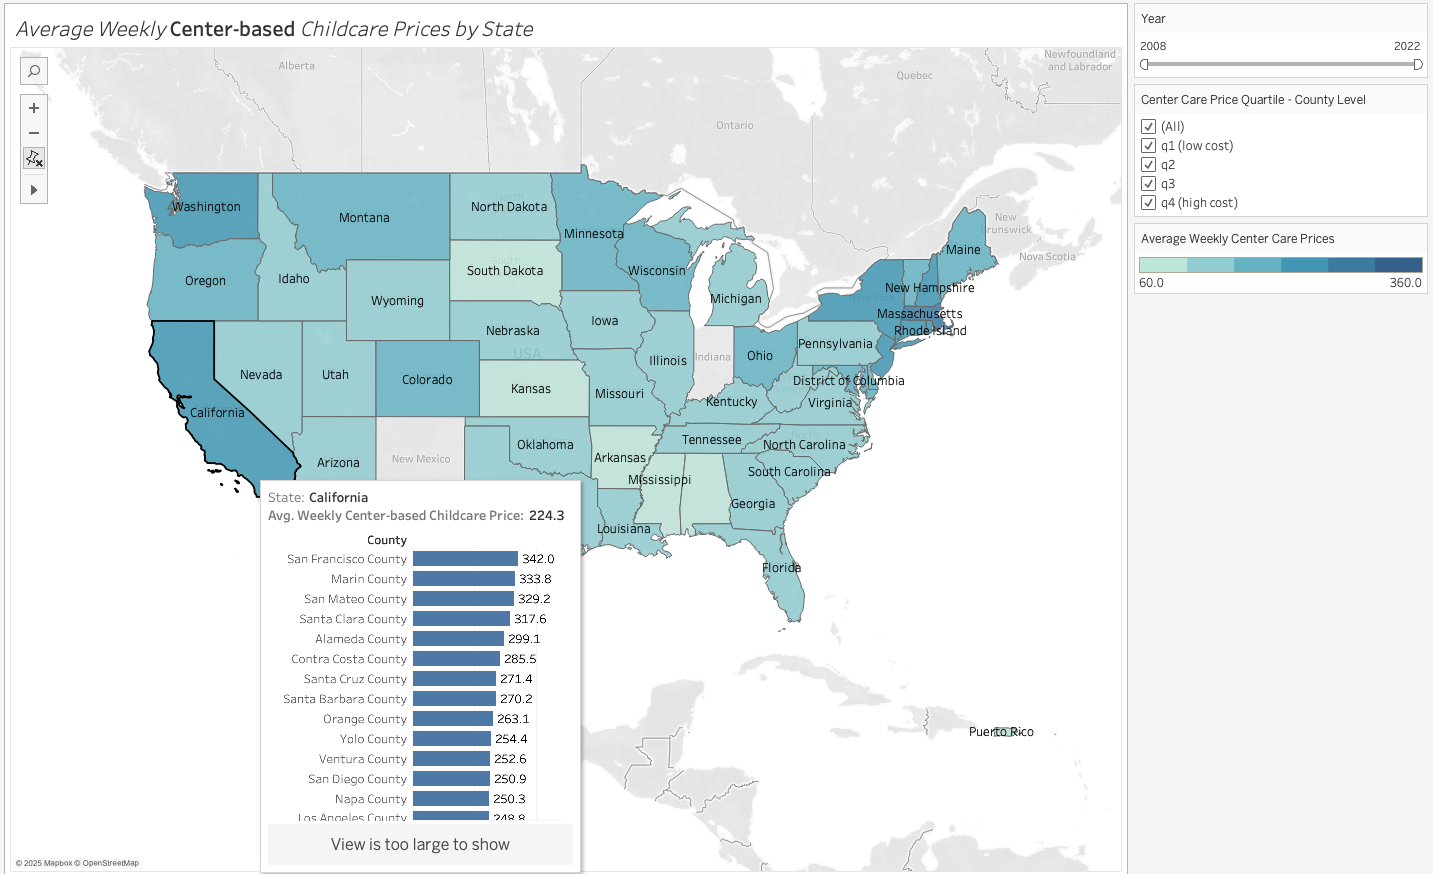

Clearly the coastal states, as well as Colorado (where there're emerging number of billionaires), have the highest average weekly center care prices for infants.

### 2. Average Weekly Family-based Childcare Prices by State

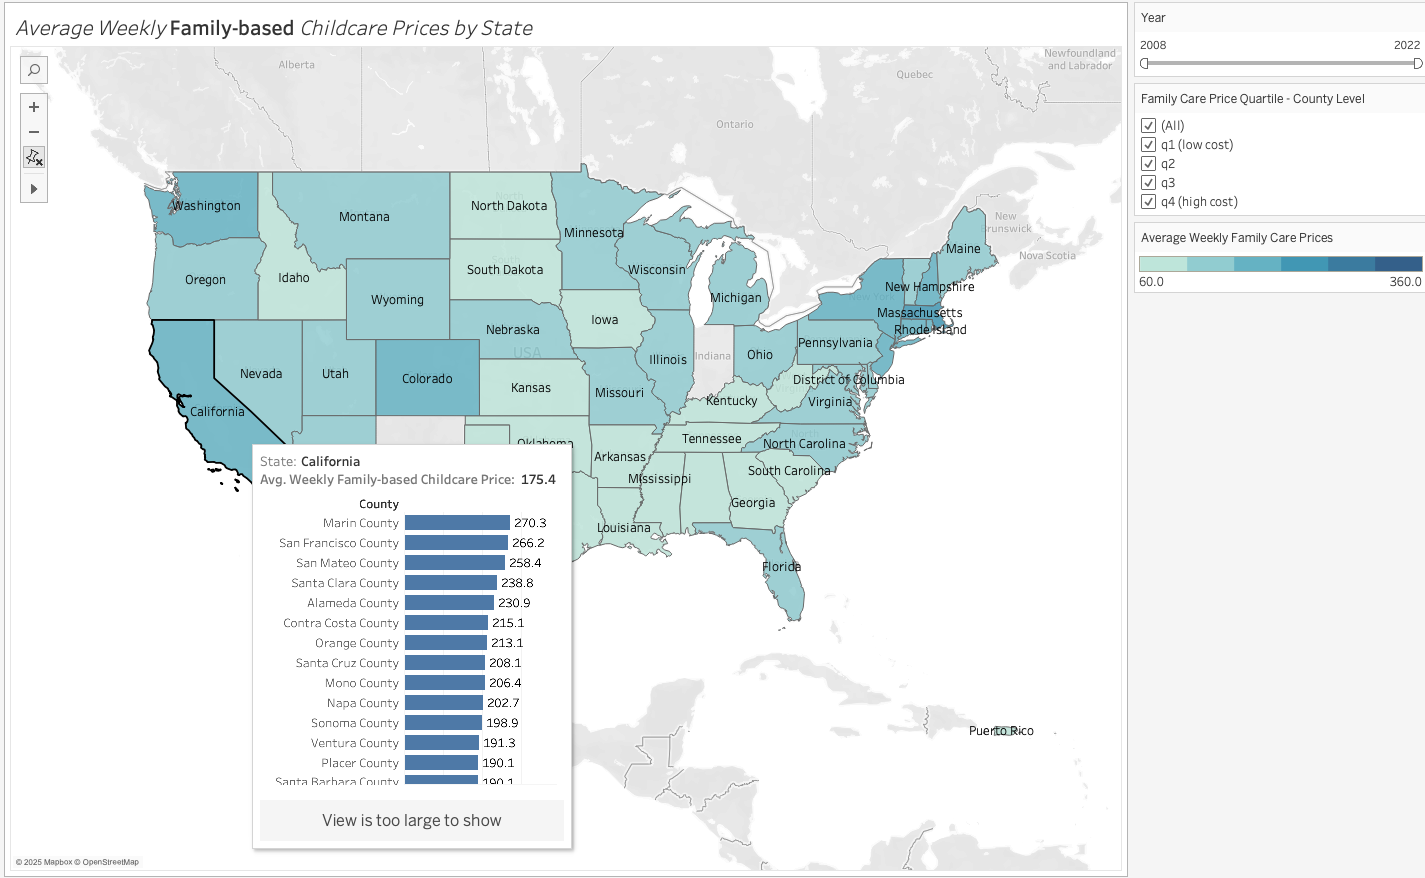

Same trend as the center-based childcare prices, but cheaper since we are using the same color scale and the colors are clearly lighter here.

### 3. Weekly Medium Childcare Prices Distribution over Time

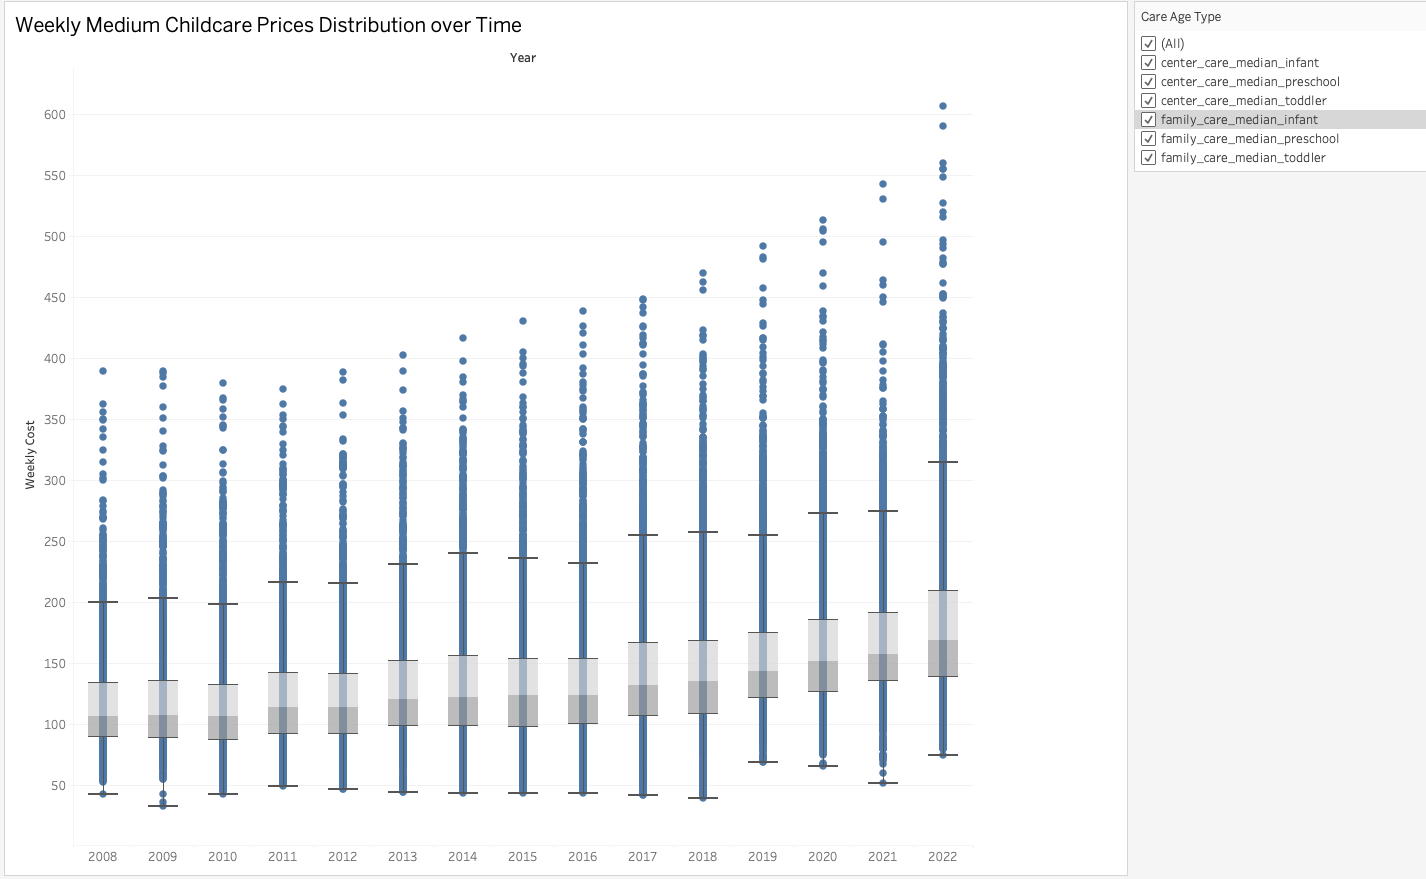

Based on the box plot, including the filters on the right for different care type and age group combinations, the overall trend of the childcare prices is upward. 2008 - 2010 the prices were consistent, bumped up from 2011, and kept steady every two years before bumping up again, until since 2019 and the prices have been increasing year-over-year.

### 4. Affordability vs. Female Labor Force Participation

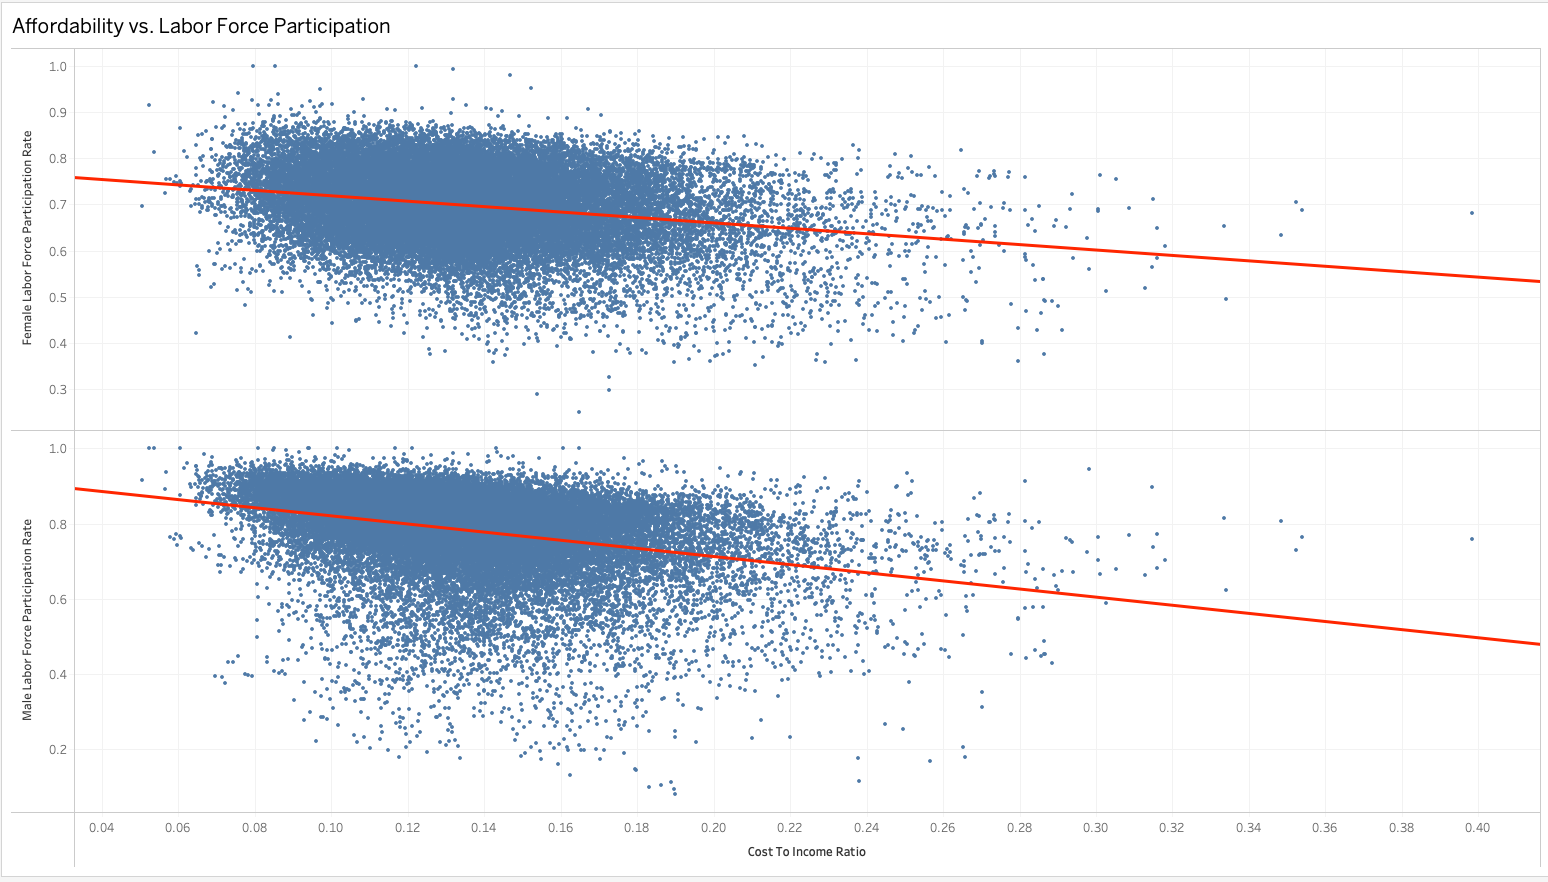

The scatter plots show negative correlation between the cost to income ratio vs. labor force participation rate, regardless of gender. However, male labor force participation rate tend to have larger inverse relationship with cost-to-income ratio. If policy makers would like to maintain male labor force participation rate, reducing the cost-to-income ratio or boosting male income might be options on the table. On the other side, females tend to be less elastic to the childcare cost to income ratio. This makes sense since most family members that choose to stay home are females ([26% females vs 7% males, 2021](https://www.pewresearch.org/short-reads/2023/08/03/almost-1-in-5-stay-at-home-parents-in-the-us-are-dads/)), so their reactions to increase in childcare are often not as dramatic as the males.

### 5. Cost to Female Income Ratio by State

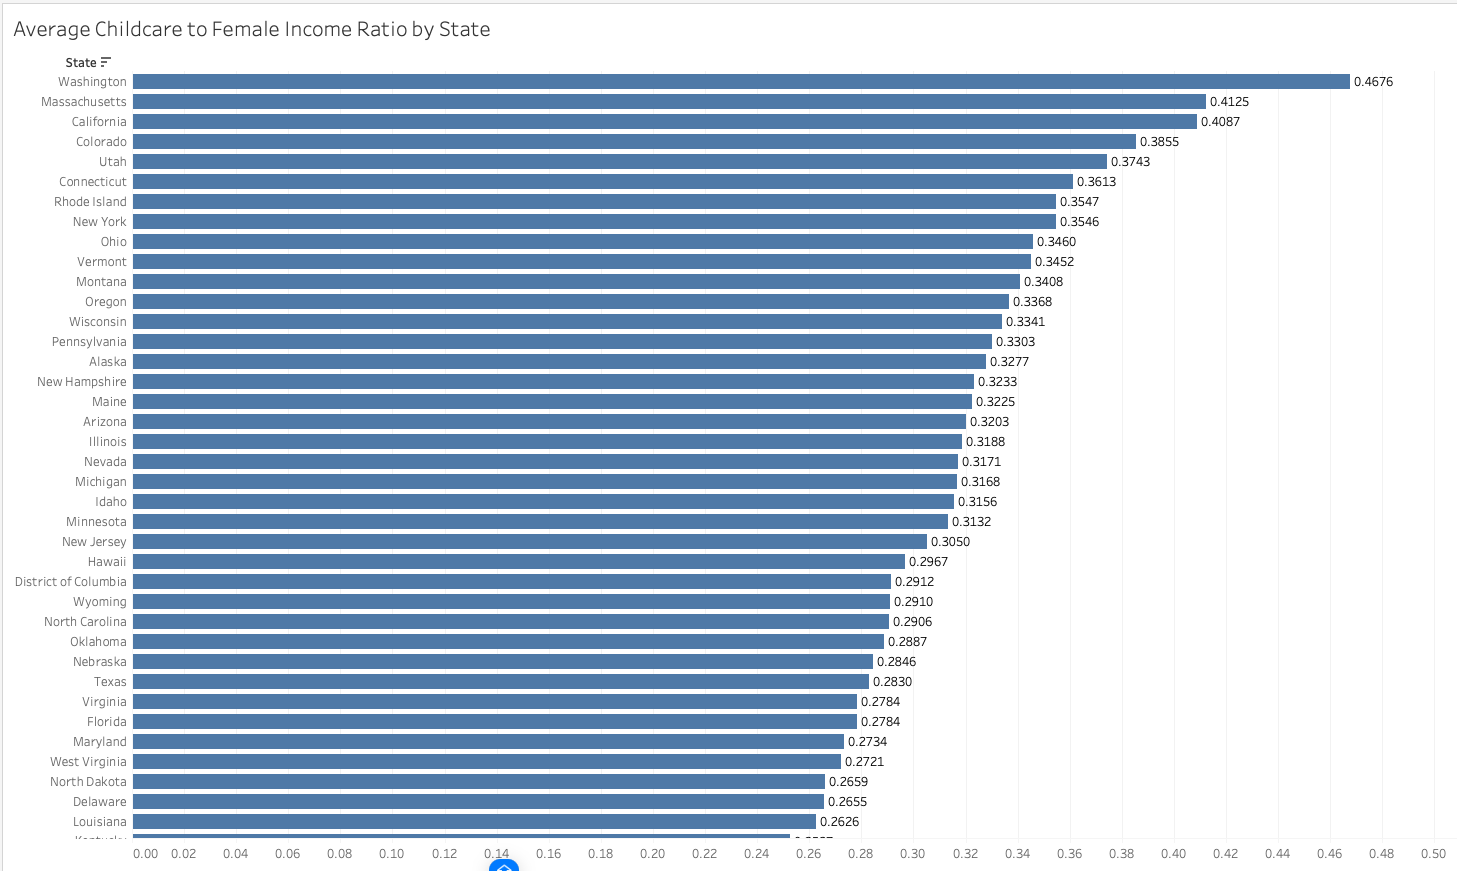

Washington State has a very high cost to income ratio for females, followed by Massachusetts, with a skyrocket rate of 0.47 and 0.41 respectively. Policymakers in these states should take careful measures to reduce the burden for single moms or families where females work as well. 

### 6. Summary Dashboard with Filter Function

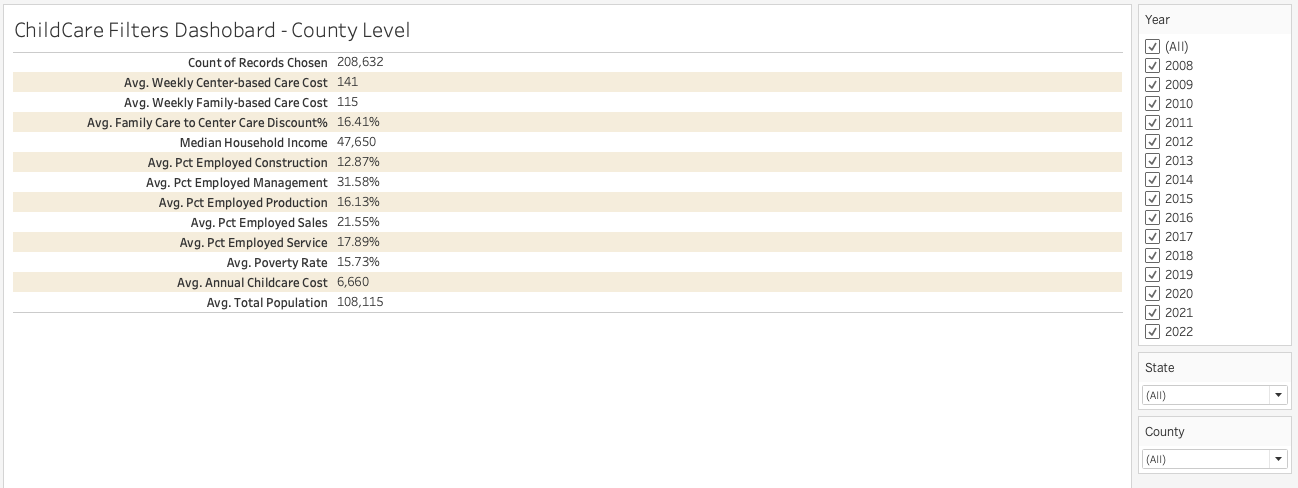

The summary dashboard above allows for more detailed drill down on specific year(s), state(s), and county(ies) after analyzing the maps and the charts. This dashoboard currently gives information on record count, average center price vs family price, average family price discount%, medium household income, average employement rate by occupation, average poverty rate, average annual childcare cost and average county population from the filter, allowing policymakers to make more seasoned decisions on the pricing of childcares, at different granularities (nation-wide vs state-wide, for instance). 

Next action items on this medium include integrating all the charts and summary board into the dashboard for interaction capability in the final deliverable.

## 2. Powerpoint Slides

### Target Audience
State legislators, County economic development boards, Childcare policy advocates, or anyone evaluating affordability and access to childcare.

For this medium, we will build a slide deck that communicates key insights + strategic implications from my childcare data analysis to a non-technical policy-oriented audience.

### Slide 1

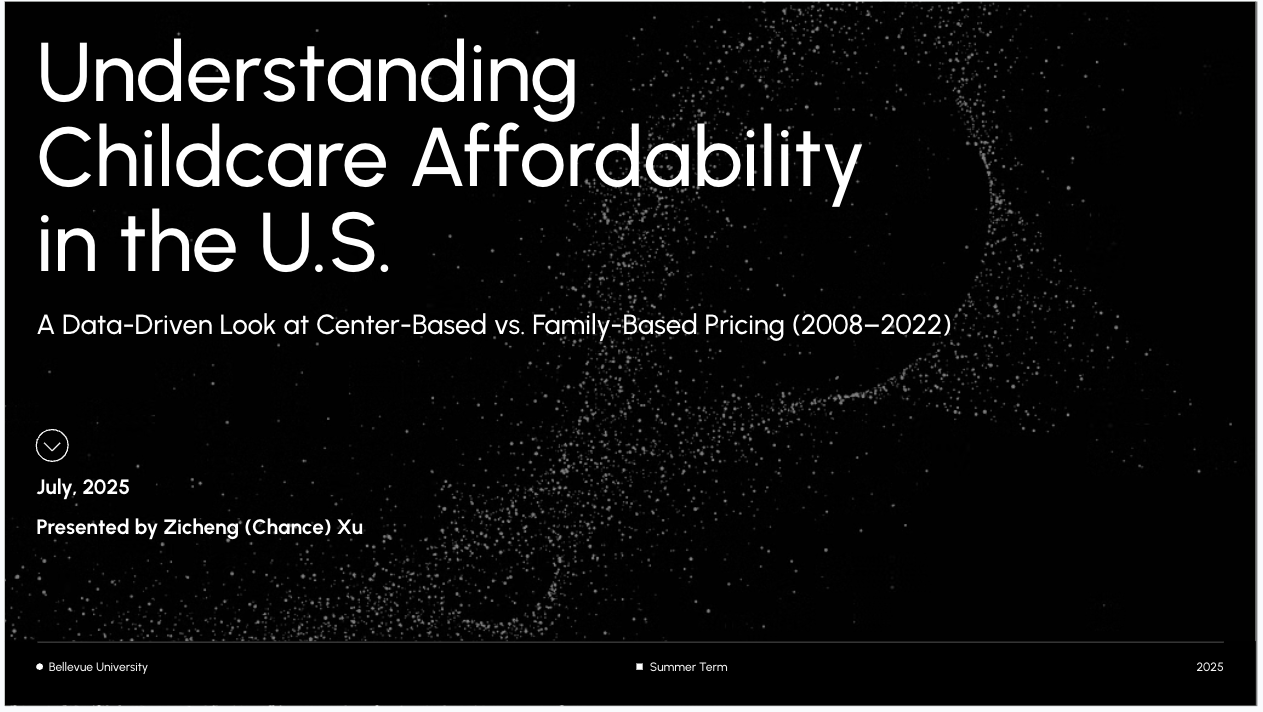

### Slide 2

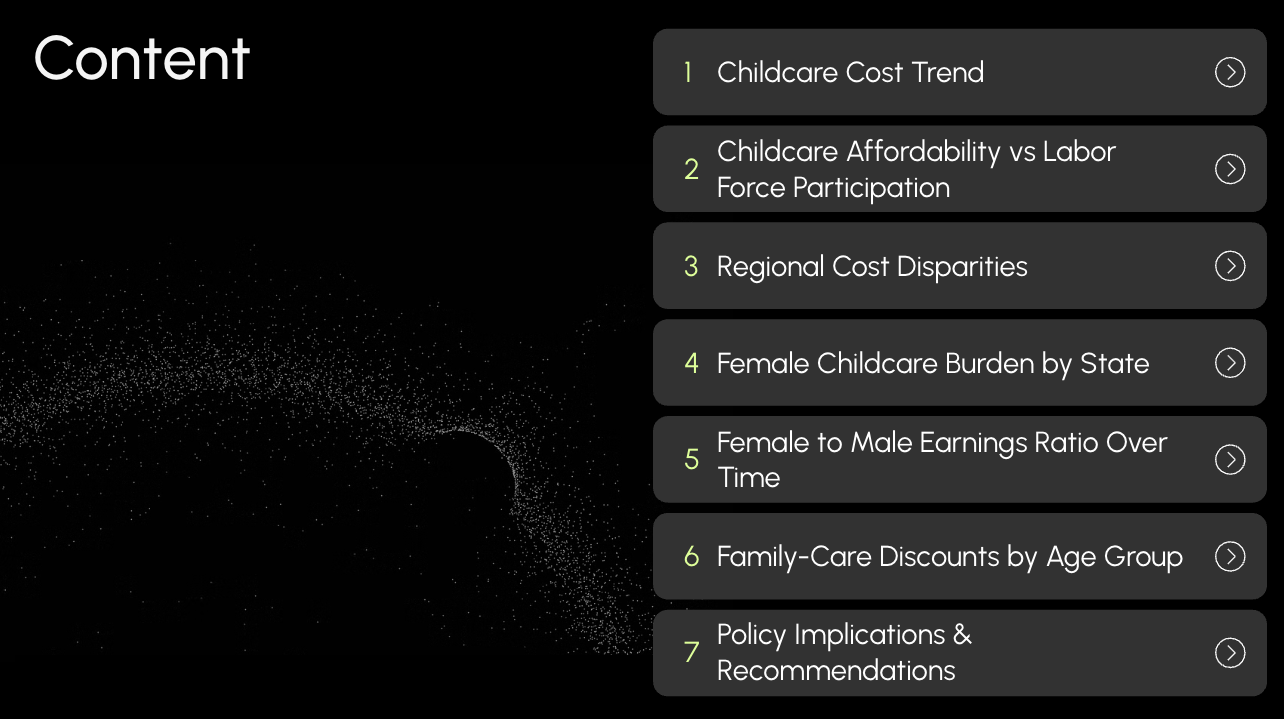

### Slide 3

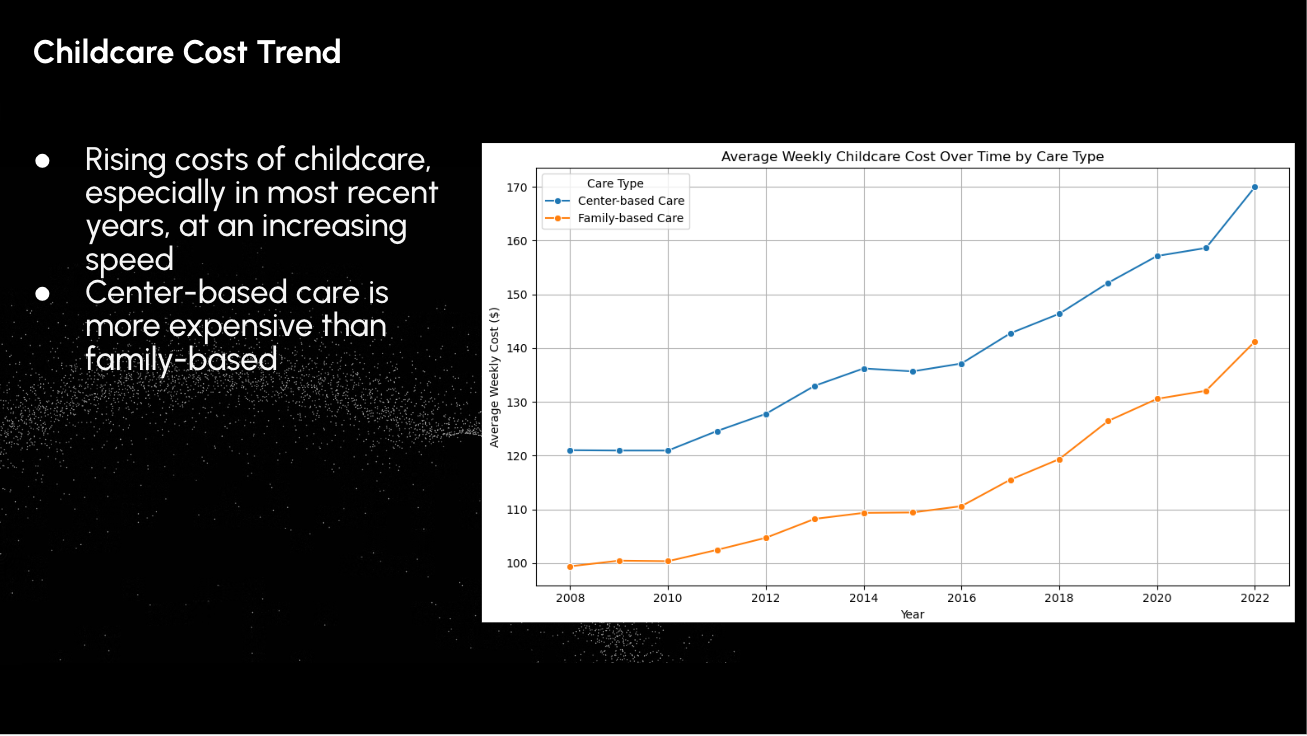

### Slide 4

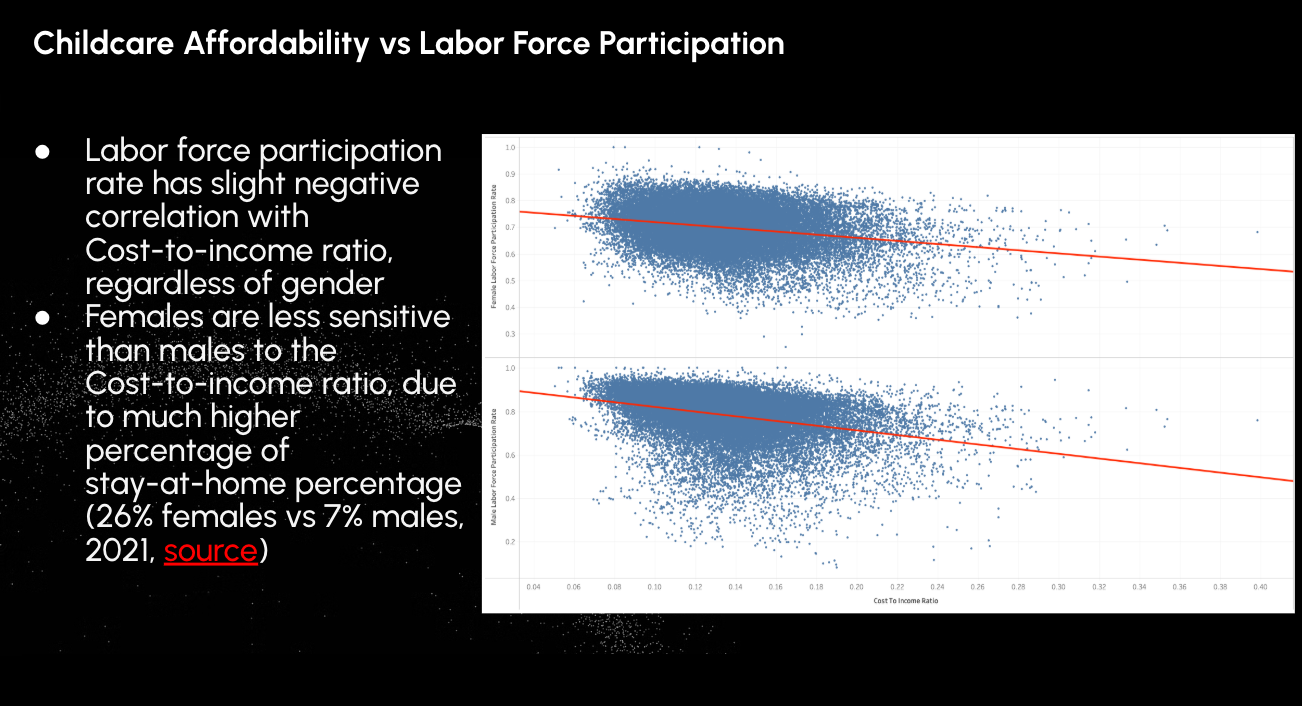

### Slide 5

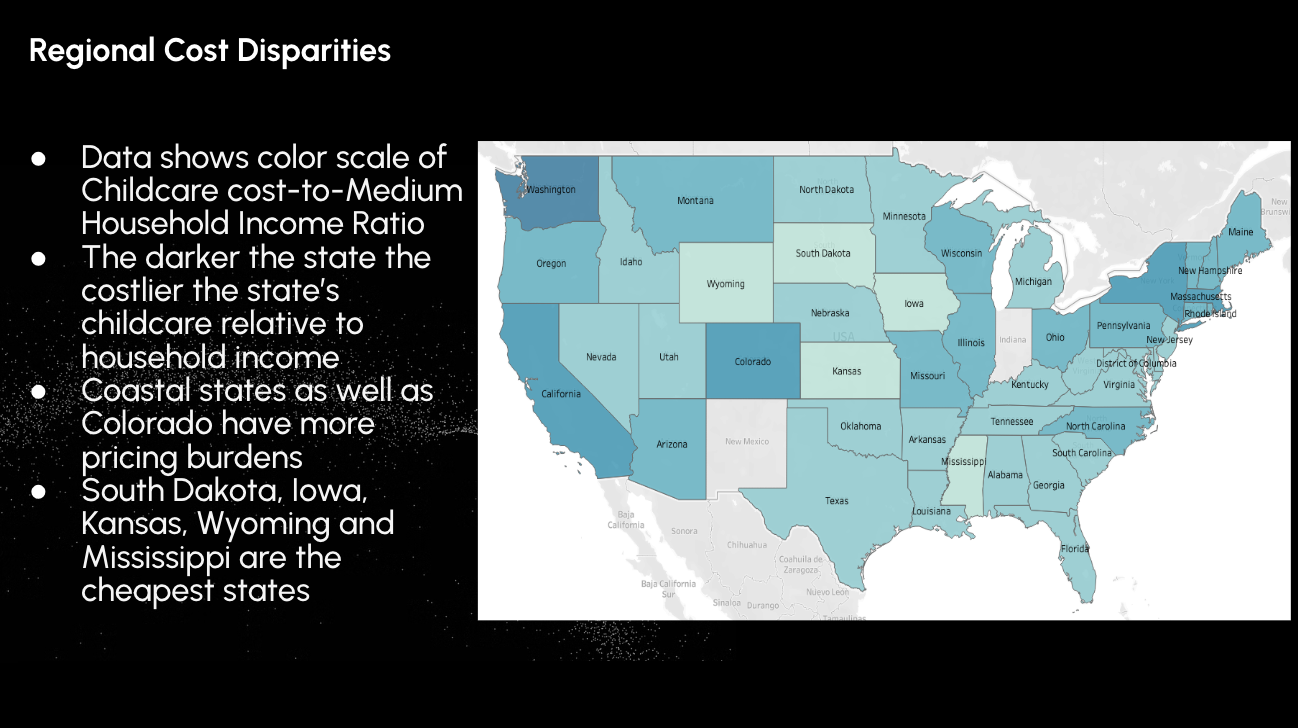

### Slide 6

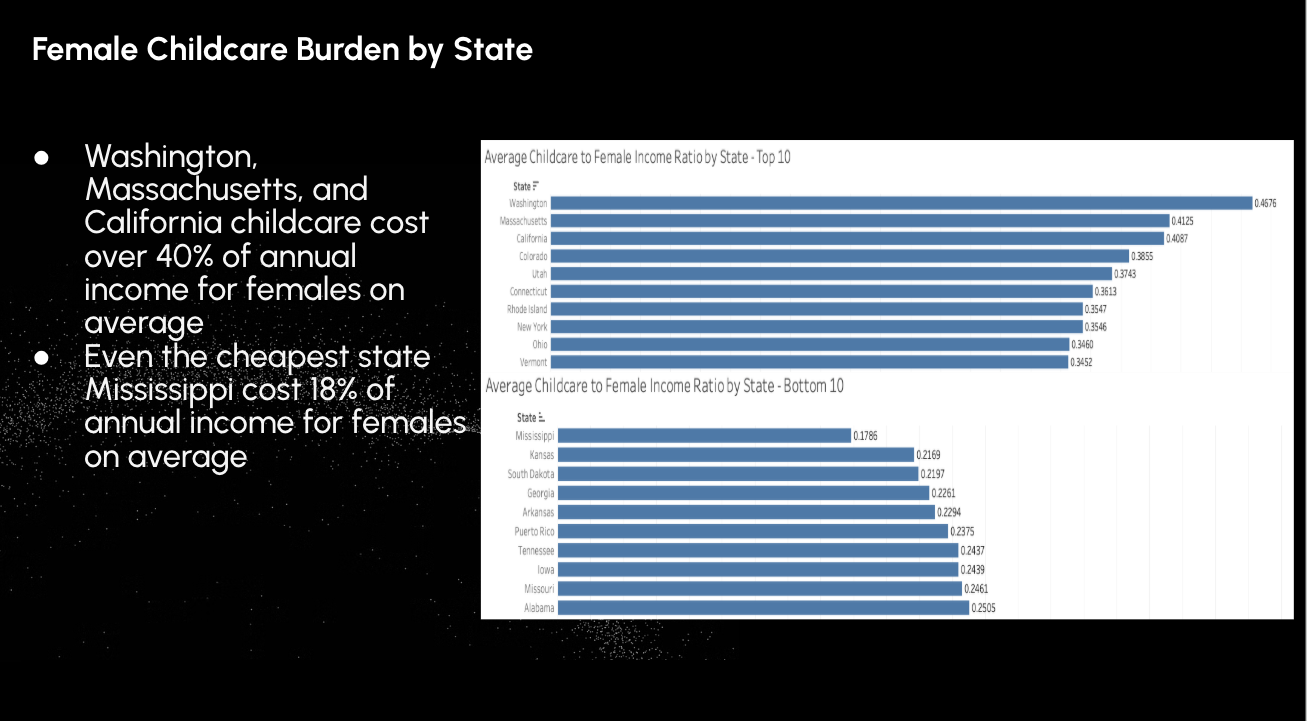

### Slide 7

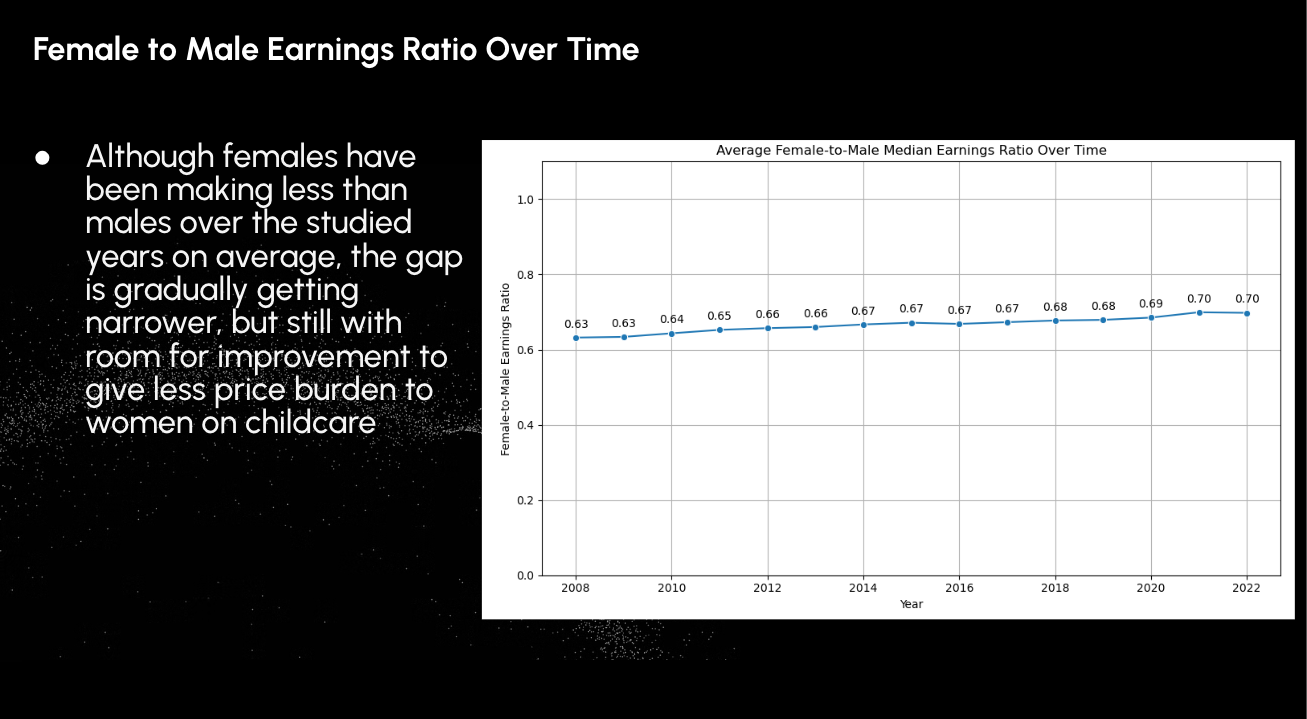

### Slide 8

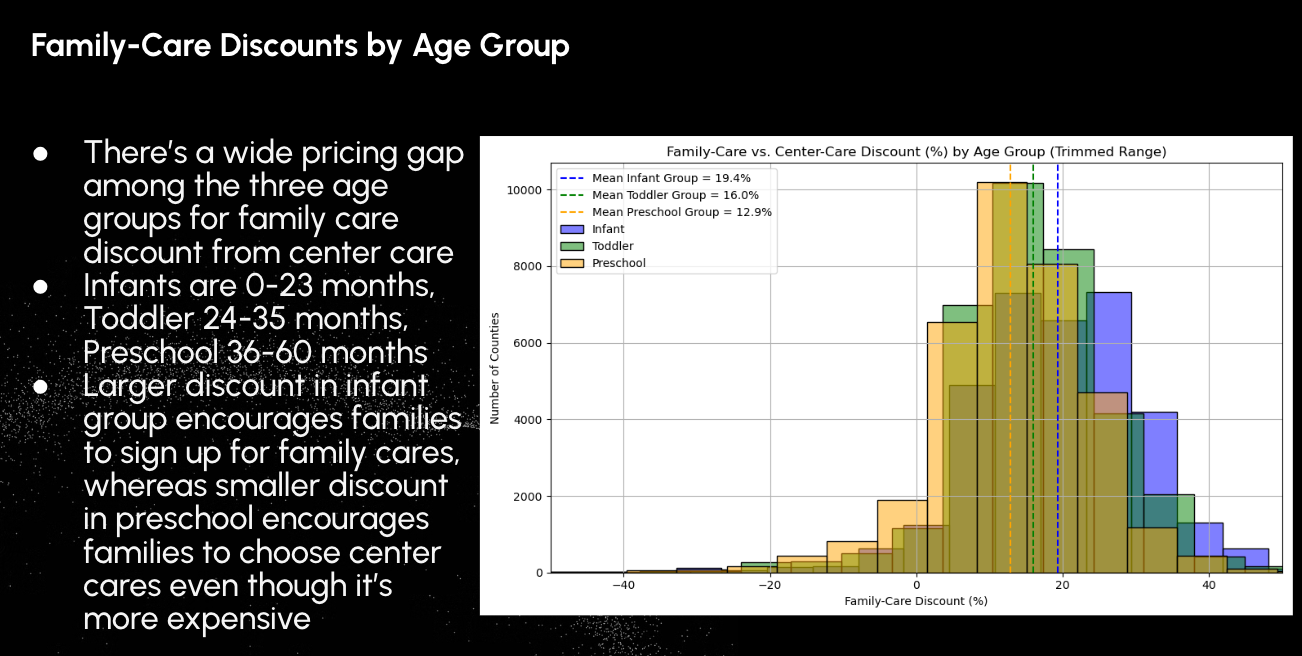

### Slide 9

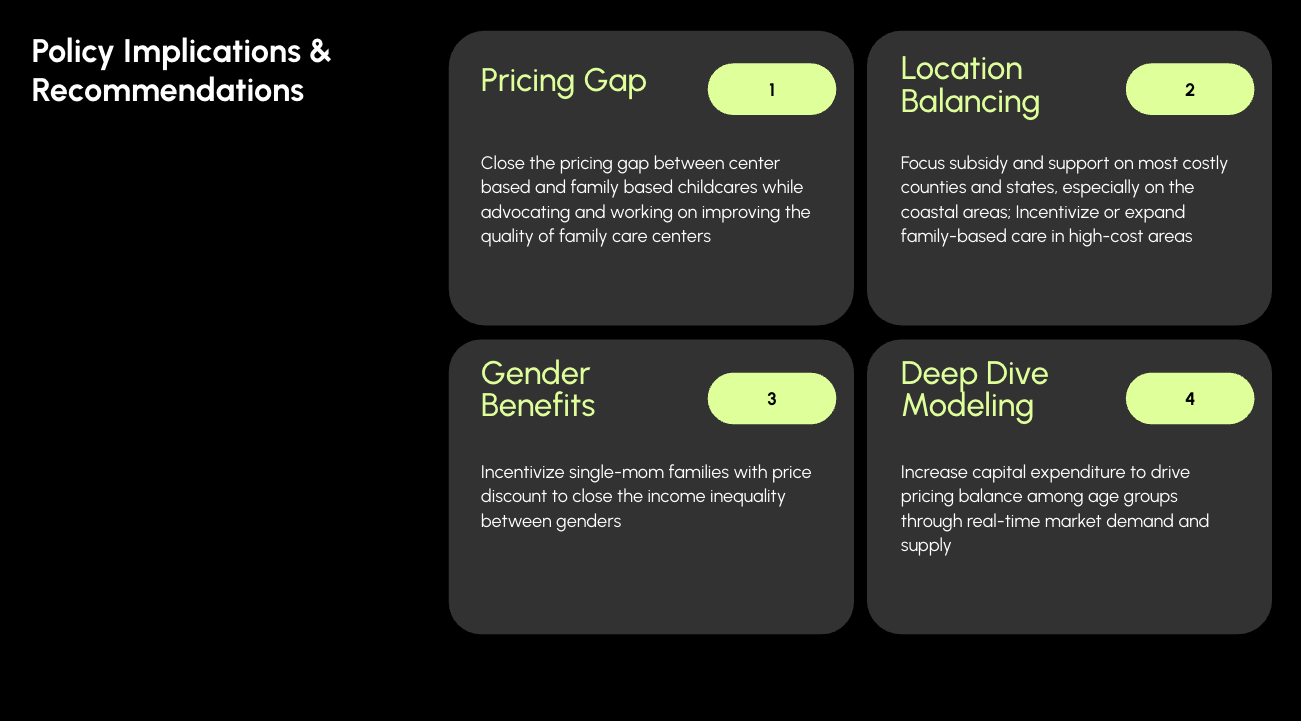

For the PowerPoint slides, the design prioritized simplicity, clarity, and a logical narrative flow suitable for a presentation audience. Each slide was intentionally focused on delivering one key insight at a time through clean, high-contrast visuals and minimal text. Visual hierarchy was established using large, legible headings, concise bullet points, and prominent visuals sourced from Tableau. Color choices remained consistent with Tableau’s original palette—blue for center-based care and orange for family-based care—to reinforce the audience’s recognition of these distinctions throughout the presentation. Layouts balanced space effectively to avoid overcrowding, using negative space to guide focus toward the most important data points.

## 3. Infographic

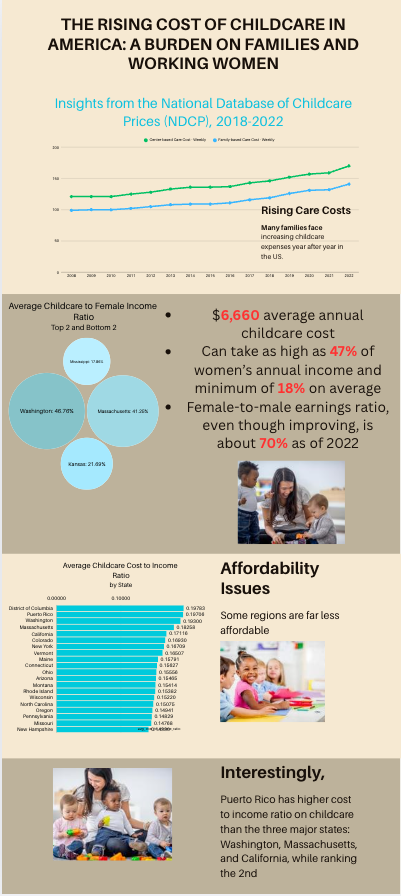

For the infographic, the design goal shifted toward creating a more public-facing, visually engaging summary of the project’s findings. The layout followed a vertical progression, moving from the problem statement to key insights and ending with takeaway statistics. Visual elements were sized proportionally to their importance; the treemap replaced a geographic map to leverage population and affordability metrics for impact while maintaining visual simplicity. Color palettes mirrored the PowerPoint for consistency but leveraged softer tones and icons to enhance accessibility. Text was minimized to focus attention on the visual storytelling through charts, key numbers, and iconography. Overall, both the PowerPoint and infographic were designed with alignment in mind—consistent use of color, structure, and key messages ensured coherence across all mediums while serving different audience expectations.

-----------
-----------
-----------

## Code Sections (**Please IGNORE**)

### Line Plot by Year & Care Type

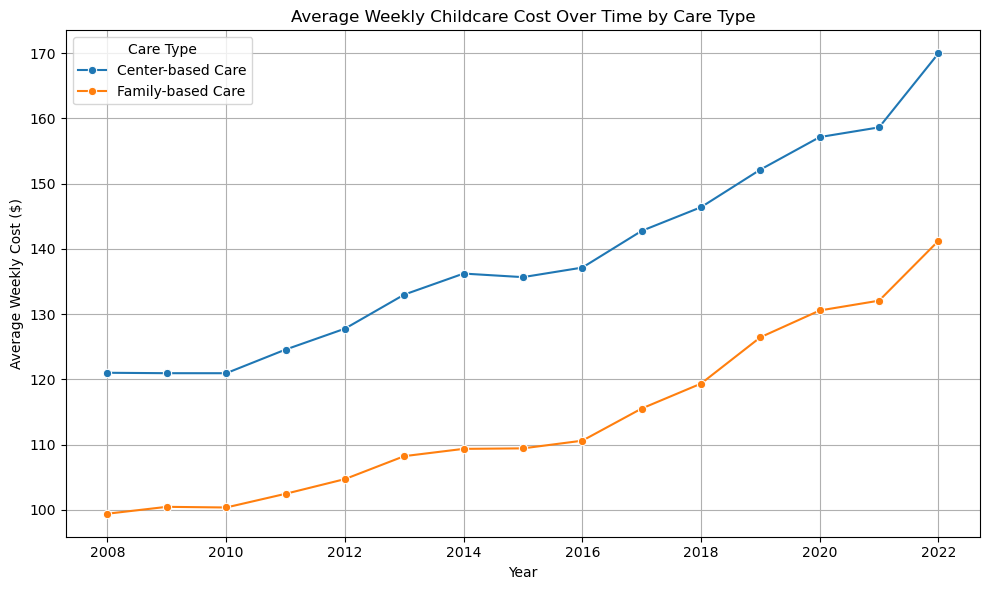

In [18]:
# Calculate averages by year and care type
yearly_avg = df.groupby('year').agg({
    'avg_center_care_cost': 'mean',
    'avg_family_care_cost': 'mean'
}).reset_index()

# Reshape to long format for seaborn
yearly_avg_long = pd.melt(
    yearly_avg,
    id_vars='year',
    value_vars=['avg_center_care_cost', 'avg_family_care_cost'],
    var_name='care_type',
    value_name='avg_weekly_cost'
)

# Clean up care_type labels for nicer legend
yearly_avg_long['care_type'] = yearly_avg_long['care_type'].map({
    'avg_center_care_cost': 'Center-based Care',
    'avg_family_care_cost': 'Family-based Care'
})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_long, x='year', y='avg_weekly_cost', hue='care_type', marker='o')

plt.title('Average Weekly Childcare Cost Over Time by Care Type')
plt.ylabel('Average Weekly Cost ($)')
plt.xlabel('Year')
plt.legend(title='Care Type')
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Female-to-Male Earnings Ratio, and Line Chart

In [21]:
# Group by year to see how the ratio changes over time
yearly_ratio = (
    df.groupby('year')[['female_median_earnings', 'male_median_earnings']]
    .apply(lambda x: (x['female_median_earnings'] / x['male_median_earnings']).mean())
    .reset_index(name='avg_fme_to_mme_ratio')
)

yearly_ratio

year  avg_fme_to_mme_ratio
0   2008              0.631966
1   2009              0.633791
2   2010              0.643285
3   2011              0.652441
4   2012              0.657036
5   2013              0.660045
6   2014              0.666836
7   2015              0.671445
8   2016              0.668321
9   2017              0.672887
10  2018              0.677284
11  2019              0.679078
12  2020              0.685042
13  2021              0.699272
14  2022              0.697687

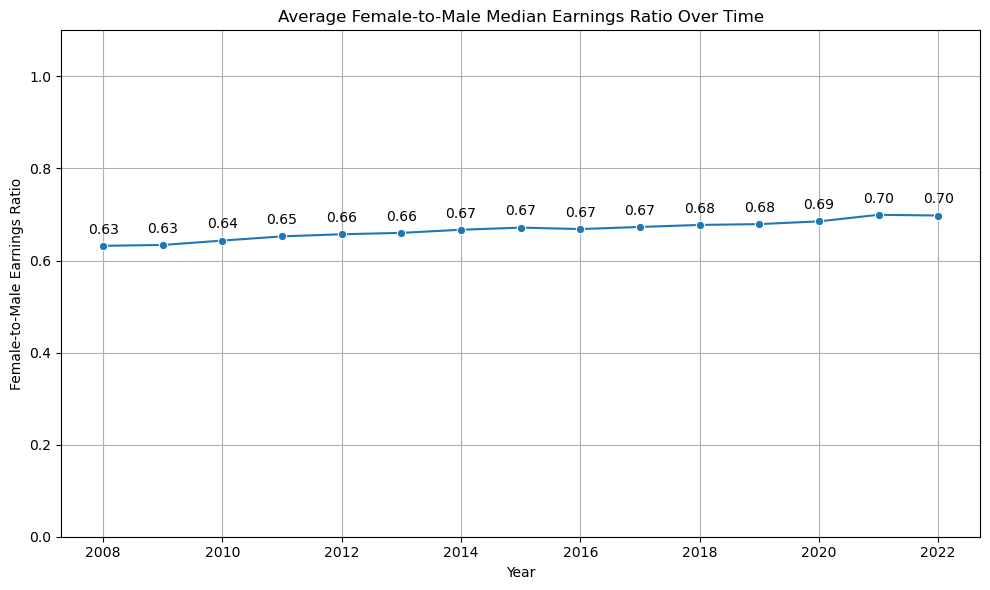

In [23]:
sns.lineplot(data=yearly_ratio, x='year', y='avg_fme_to_mme_ratio', marker='o')

# Add the text labels on each data point
for i, row in yearly_ratio.iterrows():
    plt.text(row['year'], row['avg_fme_to_mme_ratio'] + 0.02, f"{row['avg_fme_to_mme_ratio']:.2f}", 
             ha='center', va='bottom')

# Title and formatting
plt.title('Average Female-to-Male Median Earnings Ratio Over Time')
plt.ylabel('Female-to-Male Earnings Ratio')
plt.xlabel('Year')
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Histogram of Family-Care Discount by Age Group

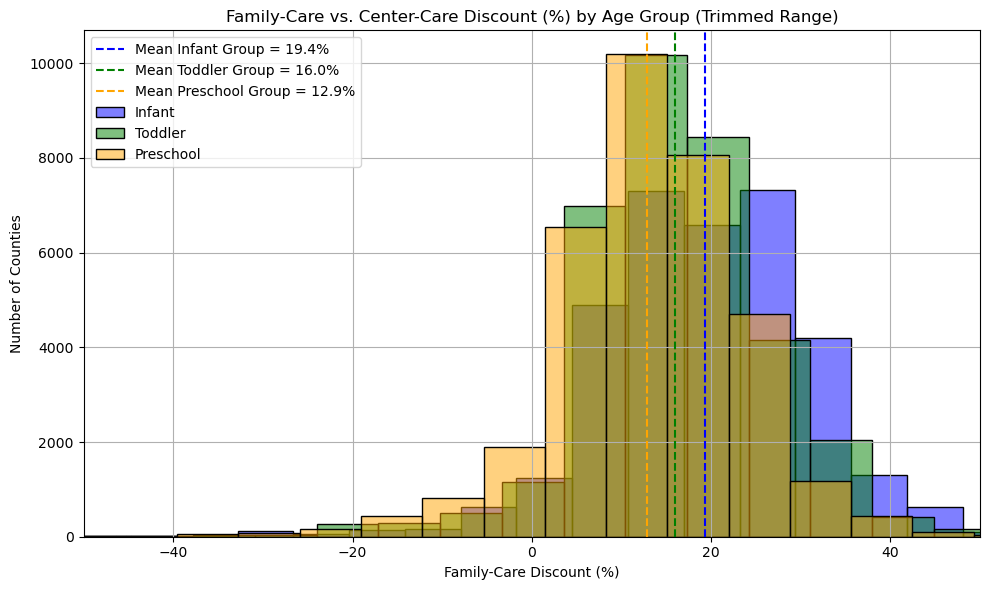

In [26]:
# Calculate % discount for each age group
df['infant_discount_pct'] = (df['center_care_median_infant'] - df['family_care_median_infant']) / df['center_care_median_infant'] * 100
df['toddler_discount_pct'] = (df['center_care_median_toddler'] - df['family_care_median_toddler']) / df['center_care_median_toddler'] * 100
df['preschool_discount_pct'] = (df['center_care_median_preschool'] - df['family_care_median_preschool']) / df['center_care_median_preschool'] * 100

# Calculate means
mean_infant = df['infant_discount_pct'].mean()
mean_toddler = df['toddler_discount_pct'].mean()
mean_preschool = df['preschool_discount_pct'].mean()

# Plotting
plt.figure(figsize=(10, 6))

sns.histplot(df['infant_discount_pct'], bins=50, color='blue', label='Infant', kde=False, alpha=0.5)
sns.histplot(df['toddler_discount_pct'], bins=50, color='green', label='Toddler', kde=False, alpha=0.5)
sns.histplot(df['preschool_discount_pct'], bins=50, color='orange', label='Preschool', kde=False, alpha=0.5)

# Add mean lines
plt.axvline(mean_infant, color='blue', linestyle='--', linewidth=1.5, label=f'Mean Infant Group = {mean_infant:.1f}%')
plt.axvline(mean_toddler, color='green', linestyle='--', linewidth=1.5, label=f'Mean Toddler Group = {mean_toddler:.1f}%')
plt.axvline(mean_preschool, color='orange', linestyle='--', linewidth=1.5, label=f'Mean Preschool Group = {mean_preschool:.1f}%')

# Set x-axis limits
plt.xlim(-50, 50)

# Final touches
plt.title('Family-Care vs. Center-Care Discount (%) by Age Group (Trimmed Range)')
plt.xlabel('Family-Care Discount (%)')
plt.ylabel('Number of Counties')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Treemap of State Population and Addordanility - Data Preparation (For Infographic)

In [29]:
# Group by state to calculate averages
state_summary = df.groupby('state').agg({
    'state_total_population': 'mean',
    'annual_childcare_cost': 'mean',
    'median_household_income': 'mean'
}).reset_index()

In [31]:
state_summary

state  state_total_population  annual_childcare_cost  \
0                Alabama            4.860401e+06            5338.026454   
1                 Alaska            7.366761e+05           10487.164677   
2                Arizona            6.862594e+06            7144.593156   
3               Arkansas            3.000169e+06            4970.007922   
4             California            3.852230e+07           10392.011724   
5               Colorado            5.549786e+06            9788.781950   
6            Connecticut            3.577083e+06           11629.693111   
7               Delaware            9.422603e+05            7645.319259   
8   District of Columbia            6.407073e+05           15023.551111   
9                Florida            2.000727e+07            6711.334327   
10               Georgia            1.054007e+07            5515.894958   
11                Hawaii            1.423377e+06           10178.669383   
12                 Idaho            1.730267e+06            5791.663664   
13              Illinois            1.281403e+07            7274.806897   
14                  Iowa            3.162175e+06            6464.682896   
15                Kansas            2.891760e+06            4674.582095   
16              Kentucky            4.414942e+06            5425.410804   
17             Louisiana            4.608225e+06            5595.776604   
18                 Maine            1.342302e+06            8077.234848   
19              Maryland            6.043606e+06            9143.127861   
20         Massachusetts            6.761406e+06           12947.879492   
21              Michigan            9.951371e+06            6667.454131   
22             Minnesota            5.484030e+06            7803.900664   
23           Mississippi            2.985605e+06            3554.983406   
24              Missouri            6.110178e+06            7007.148571   
25               Montana            1.068236e+06            7805.160149   
26              Nebraska            1.935187e+06            6898.621137   
27                Nevada            2.797026e+06            7256.199236   
28         New Hampshire            1.366405e+06           10253.557889   
29            New Jersey            8.979716e+06           10696.532579   
30              New York            1.964551e+07           10769.104014   
31        North Carolina            1.029484e+07            7063.464436   
32          North Dakota            7.277517e+05            6335.510591   
33                  Ohio            1.162923e+07            8035.519199   
34              Oklahoma            3.869844e+06            6275.385287   
35                Oregon            4.030833e+06            7384.074951   
36          Pennsylvania            1.274049e+07            7534.843184   
37           Puerto Rico            3.263584e+06            4030.144444   
38          Rhode Island            1.070576e+06           12140.032667   
39        South Carolina            5.056868e+06            6116.391353   
40          South Dakota            8.567445e+05            4831.724983   
41             Tennessee            6.609230e+06            5419.142353   
42                 Texas            2.747896e+07            5995.263838   
43                  Utah            3.013320e+06            6609.723985   
44               Vermont            6.263654e+05            9001.649694   
45              Virginia            8.329107e+06            6928.232145   
46            Washington            7.184628e+06           10430.555852   
47         West Virginia            1.823882e+06            5798.667911   
48             Wisconsin            5.765692e+06            8212.553730   
49               Wyoming            5.815299e+05            7071.312986   

    median_household_income  
0              40508.748259  
1              76991.641791  
2              46197.111111  
3              40193.974093  
4              60714.559113  
5            

In [33]:
# Calculate the ratio of annual childcare cost to median household income
state_summary['avg_cost_to_income_ratio'] = state_summary['annual_childcare_cost'] / state_summary['median_household_income']

# Rename columns for clarity
state_summary = state_summary.rename(columns={
    'state_total_population': 'avg_state_population'
})

# Select final columns and reorder
state_summary = state_summary[['state', 'avg_state_population', 'avg_cost_to_income_ratio']]

# Save to CSV for Canva treemap
state_summary.to_csv('state_childcare_income_population.csv', index=False)